# Homework 1

## References

+ Lectures 1-3 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

## Student details

+ **First Name:** Mihir 
+ **Last Name:** Nadig
+ **Email:** mnadig@purdue.edu

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.<br>
**Answer:** p(B|I) = 0.004

*Reasoning: Probability of that any patient has tuberculosis is given in the given information by the prevalance rate.*
<br><br><br><br><br><br><br><br>

B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.<br>
**Answer:** p(A|B,I) = 0.80



*Reasoning: We assume that the patient has tubercolosis and that it is a true statement, then the probability that the test is positive is given in the second statement in the given information.*
<br><br><br><br><br><br><br><br>

C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.<br>
**Answer:** $p(A|\neg B, I)$ = 0.10


*Reasoning: Assuming that the patient is healthy, we are looking for the probability the patient tests positive or a false positive rate. This can be found in the last given statement for i. Since the test will be negative 90% of the time for a healthy patient, there is a 10% chance of a false positive.*
<br><br><br><br><br><br><br><br>



```
# This is formatted as code
```

D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.<br>
**Answer:** 0.031

*This is solved using Bayesian logic as shown in the attached derivation at the end. (Handwritten on the ipad.)*
<br><br><br><br><br><br><br><br>

E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?<br>
**Answer:** 0.00089

This changes the prior state of knowledge bc we now assume they are healthy statistically. Test is useful but to a limited degree. Considering p(B,I) you assumed the patient was negative anyway therefore there is not a major significance to the result. 

In the real world, I would argue that it is useful for the patient if they are at risk, but unless they show symptoms or there is an external factor it is not needed. Yes it changes our prior state of knowledge but there is .996 probability that this could have been assumed anyway. 

*Derivation attached in handwritten notes*
<br><br><br><br><br><br><br><br>

F. What would a good test look like? Find values for 

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis<br>
**Answer:** <br>
$p(A|B,I)$ = .9 <br>
$p(A| \neg B, I)$ = .00001

*This will yield the following:* <br>
$p(B|A, I)$ = .9974<br>

*In my opinion I would pick a test with a lower probability of false positive rate as that had a bigger influence of the correlation between disease and positive screen.*<br>

*From my limited research there does not exist a test that satisfies these conditions. From my limited research the nih cross-reactivity as a factor with TB tests causing false positives in a rate of .1-2.3% which is too high to meet the proposed conditions.* <br>

*Computation provided in the code block below, derivation in the attached handwritten derivations.*



<br><br><br><br><br><br><br><br>

In [ ]:
# Solving for problem 1 part E 

goal = .99 

a_b = .9 
a_nb = .00001
b = 0.004
nb = 1-b

eqn = (a_b*b)/(a_b*b+a_nb*nb)
print(eqn)

0.9972409666589104


## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:** E[X] = 1.7 

*Work shown in code block below*
<br><br>

In [ ]:
# Definition of Outcomes (K values)
xs = np.array([0, 1, 2, 3])
# Definition of Probabilities (X Categorical)
ps = [0.3, 0.1, 0.2, 0.4] 
# Definition of categorical r.v.  
X = st.rv_discrete(name="Custom Categorical", values=(xs, ps))

# Expectation
expectation = round(X.expect(),2)  
print(f"E(X) = {expectation}")


E(X) = 1.7


B. The variance $\mathbb{V}[X]$.

**Answer:** V[X] = 1.61 

*Work shown in the code block below and rounded to two decimal places.*
<br><br>

In [ ]:
# Variance 
variance = X.var()
print(f"V[x] = {round(variance, 2)}")

V[x] = 1.61


C. Plot the probability mass function of $X$.

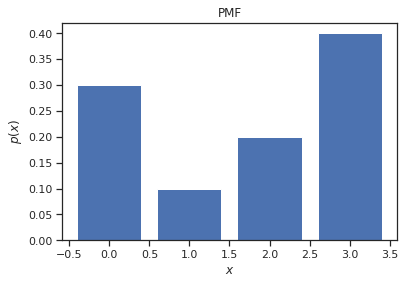

In [ ]:
# PMF Plotted 
fig, ax = plt.subplots()
ax.bar(xs, X.pmf(xs))
ax.set_title("PMF")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$");

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:** p = 0.5 

p$\{0, 2\}$ = p(0) + p(2) 

*Remaining work shown in code block below*
<br><br>

In [ ]:
# Calculating subset probability below
psubset = ps[0] + ps[2]
print(f" p(subset) = {psubset}")

 p(subset) = 0.5


E. Find $\mathbb{E}[4X + 3]$.

**Answer:** 9.8

*remaining work shown below, expectation rounded to 2 decimal places
<br><br>

In [ ]:
# Expectation Manipulation 
exp2 = 4*expectation+3 # expectation solved earlier
print(f"Manipulated Expectation: {exp2}")


Manipulated Expectation: 9.8


F. Find $\mathbb{V}[4X+3]$.

**Answer:** V[4X+3] = 25.76




*Remaining work shown in code block below*
<br><br>

In [ ]:
# Variance Manipulation
var2 = round(variance*4**2,2)
print(f"Manipulated Variance: {var2}")

Manipulated Variance: 25.76


## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

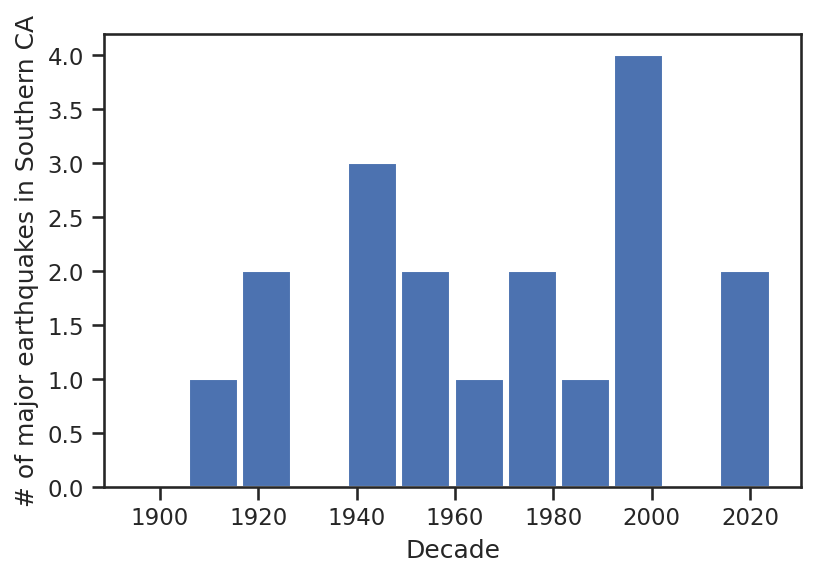

In [ ]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019 
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA');

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [ ]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [ ]:
X = st.poisson(r)


A. Plot the probability mass function of ``X``.

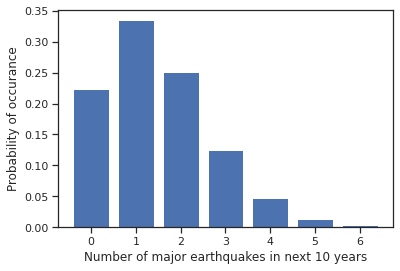

In [ ]:
# Plotting the PMF of the Poisson Distribution for 1 decade
ks = range(7)
fig, ax = plt.subplots()
ax.bar(ks, X.pmf(ks));
ax.set_xlabel('Number of major earthquakes in next 10 years')
ax.set_ylabel('Probability of occurance');

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:** p = 0.78
<br><br><br><br><br><br><br><br>

In [ ]:
# Calculating probability of at least one major earthquake
prob = X.pmf(ks)
print(type(prob))
print(prob)

# I way overcomplicated it. It should just be 1- p(0) or adding all remaining prob
prob_min_one = 1 - prob[0]
print(prob_min_one)
print(f"1-p(0) = {round(prob_min_one, 2)}")

<class 'numpy.ndarray'>
[0.22313016 0.33469524 0.25102143 0.12551072 0.04706652 0.01411996
 0.00352999]
0.7768698398515702
1-p(0) = 0.78


C. What is the probability that at least one major earthquake will occur during the next two decades?

> Indented block


Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.
And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.
<br>
**Answer:** p = 0.95<br>

*Work and PMF shown in code block below*
<br><br><br><br><br><br><br><br>

range(0, 6)
[0.04978707 0.14936121 0.22404181 0.22404181 0.16803136 0.10081881]
0.950212931632136
1-p(0) = 0.95


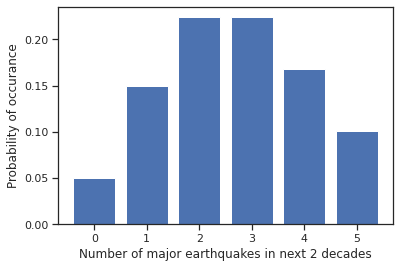

In [ ]:
# You can also answer with code here:
# Approach: adjusted lambda to match the number of decades being considered
r1 = 1.50
decades = 2

r12 = r1*decades
X12 = st.poisson(r12)

xd = range(6)
prob20 = X12.pmf(xd)
print(xd)
print(prob20)

fig, ax = plt.subplots()
ax.bar(xd, X12.pmf(xd));
ax.set_xlabel(f'Number of major earthquakes in next {decades} decades')
ax.set_ylabel('Probability of occurance');

prob_min_one_20 = 1-prob20[0]
print(prob_min_one_20)
print(f"1-p(0) = {round(prob_min_one_20, 2)}")


D. What is the probability that at least one major earthquake will occur during the next five decades?<br>
**Answer:** p = 0.999 <br>

Work and PMF shown in code block below. (Rounded to 3 decimal places)
<br><br><br><br><br><br><br><br>

range(0, 15)
[0.00055308 0.00414813 0.0155555  0.03888874 0.0729164  0.10937459
 0.13671824 0.14648383 0.13732859 0.11444049 0.08583037 0.05852071
 0.03657544 0.02110122 0.01130422]
0.9994469156298522
1-p(0) = 0.999


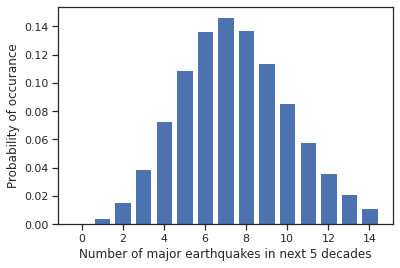

In [ ]:
# You can also answer with code here:
#Adjusted lambda for rate across 5 decades 
decades = 5 
r3 = r1*decades 

X3 = st.poisson(r3)
xd3 = range(15)
prob50 = X3.pmf(xd3)
print(xd3)
print(prob50)

fig, ax = plt.subplots()
ax.bar(xd3, X3.pmf(xd3));
ax.set_xlabel(f'Number of major earthquakes in next {decades} decades')
ax.set_ylabel('Probability of occurance');

prob_min_one_50 = 1-prob50[0]
print(prob_min_one_50)
print(f"1-p(0) = {round(prob_min_one_50, 3)}")



In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('MihirNadig_homework-01.ipynb')

--2022-06-27 01:06:39--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-06-27 01:06:39 (23.4 MB/s) - ‘colab_pdf.py’ saved [1864/1864]



MessageError: ignored